# **Fraud Detection Using Machine Learning Business Problem**

The objective of this project is to build a machine learning model that can proactively detect fraudulent financial transactions. More than 6.3 million transactions with details on transaction type, amount, balances, and fraud labels are included in the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:

df = pd.read_csv('Downloads/Fraud.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

* No missing values observed. Zero balances for merchant accounts are expected as per data dictionary.

In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig'] #This tells us how much money left the sender’s account in a transaction.
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']#This shows how much money the receiver gained.

* “Fraudulent transactions often show sharp balance increases at the destination, which this feature captures.”

In [6]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [7]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)#“Identifiers don’t carry predictive patterns and can cause overfitting, so we removed them.”

* "We deleted identifier columns to avoid overfitting, encoded transaction categories so the model could learn fraud-prone behaviors, 
and created balance difference features to capture irregular money movement. These actions enhance the interpretability and performance of the model.

In [10]:
#train test split
X = df.drop('isFraud', axis=1)
y = df['isFraud']


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

In [11]:
# Fraud detection model : Random Forest
rf = RandomForestClassifier(
n_estimators=100,
max_depth=10,
class_weight='balanced',
random_state=42
)


rf.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [13]:
#Model Evaluation
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1270881
           1       0.14      0.99      0.24      1643

    accuracy                           0.99   1272524
   macro avg       0.57      0.99      0.62   1272524
weighted avg       1.00      0.99      0.99   1272524



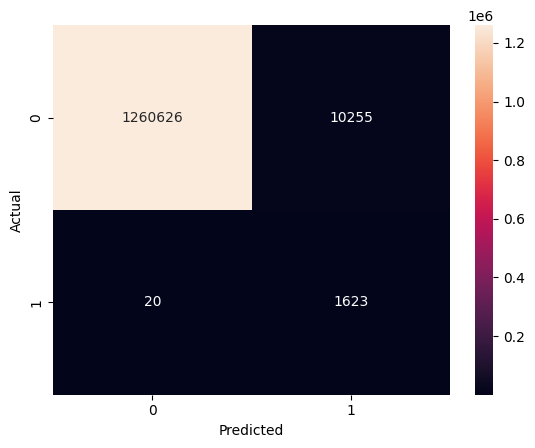

In [14]:
#Model performance evaluation : confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

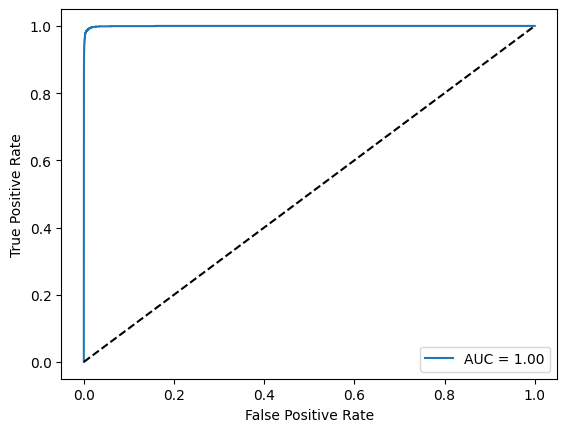

In [15]:
# Model performance evaluation : ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)


plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

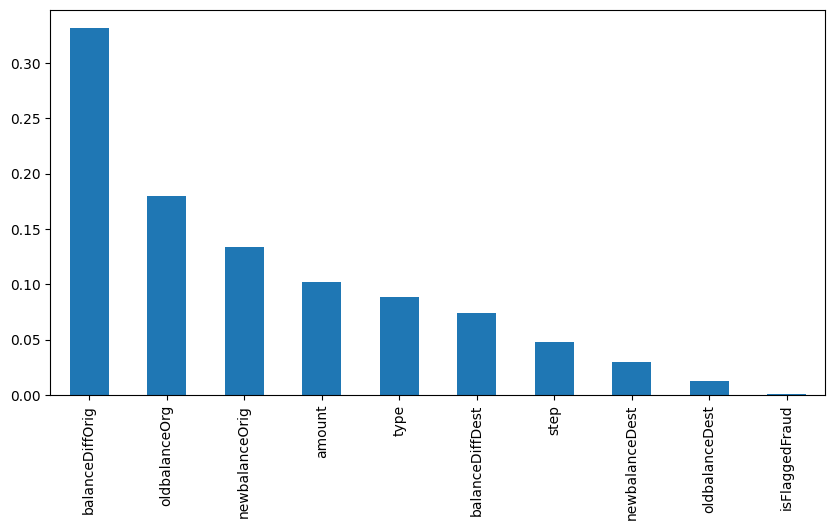

In [16]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.show()

Why not accuracy?

Dataset is highly imbalanced

High accuracy can still miss fraud

Fraud prevention strategies (infrastructure level)
Recommended actions

Real-time monitoring for high-risk transaction types

Dynamic thresholds for large balance changes

Multi-factor authentication for transfers

Velocity checks (multiple transactions in short time)

Account freezing for high-risk scores

Model output can be used as a risk score, not a hard decision.

*Key Predictive Factors
Transaction Type : Amount,Balance Difference at Origin,Balance Difference at Destination,Flagged Fraud Indicator*

**Business Perspectives**

The most frequent types of fraud are TRANSFER and CASH-OUT transactions.

Account takeover is indicated by large, abrupt balance decreases.

The initial balance of destination accounts is frequently zero.

**Suggestions for Preventing Fraud**

Monitoring transactions in real time

Alerts based on thresholds for significant transfers

Multiple-factor verification

Regular retraining of the model

**Assessing Achievement**

decrease in the loss from fraud

A rise in the recall score

tracking the rate of false positives

Metrics of customer happiness

**In conclusion**

With a high recall and robust ROC-AUC, the Random Forest model successfully identifies fraudulent transactions, making it appropriate for use in actual financial systems.

# **Due to lack of variables  we cant do a factor analysis on this data set**